# Python Code for 
# A Beginner's Guide to First Data Analysis Project using Linear Regression in R

# Created by Parth, Kanika Tayal and Anubhav Dubey



While we have tried our best to create a parallel code in Python, we faced certain challenges which we could not overcome at this point of time.
Therefore, certain tasks could not be completed.
However, we will continue our endeavour and update the code as soon as possible.
We welcome your queries and suggestions. These can be mailed to us at anubhav.dubey.stats@gmail.com
We look forward to hearing from you.

In [1]:
# Load the libraries with aliases
import numpy as np                #for high dimensional arrays and for implementing mathematical operations on them
import pandas as pd               #for data manipulation eg-readin,writing the file
import matplotlib.pyplot as plt   #for plotting data 
import scipy.stats as stats       #for using statistical functions and statistical distributions
import seaborn as sn              #for presenting data with attractive visual graphics eg-Heatmaps
import statsmodels.api as sm      #for statistical computations eg-modelling,tests
import sklearn.metrics as sk      #for machine learning

# 1. Dataset

We use the Carseats dataset which is a part of the ISLR package. 

The dataset is simulated and it is described in the lines that follow:

 It is in the format of a data frame with 400 observations on the following 11 variables:
1.	Sales - Unit sales (in thousands) at each location
2.	CompPrice - Price charged by competitor at each location
3.	Income - Community income level (in thousands of dollars)
4.	Advertising - Local advertising budget for company at each location (in thousands of dollars)
5.	Population - Population size in region (in thousands)
6.	Price - Price company charges for car seats at each site
7.	ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8.	Age - Average age of the local population
9.	Education - Education level at each location
10.	Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11.	US – A factor with levels No and Yes to indicate whether the store is in US or not

# 1.1. Loading the dataset


# Task: Store the dataset in another variable and examine its structure

In [2]:
# Read data from file 'filename.csv' using pandas library 
# (in the same directory that your python process is based else specify the complete path)

prodata = pd.read_csv("C:\\Users\\admin\\Downloads\\Carseats.csv") 

# Preview the first 5 lines of the loaded data 
prodata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# display all columns and their data types with .info()
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB



# 2. Univariate Analysis 

# Task: Summarise the data


In [4]:
# an overview of the values each column contains with .describe()
prodata.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# .describe() only analyzes numeric columns by default, but you can provide other data types if you use the include parameter
# here we will use numpy library
prodata.describe(include = np.object)

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258



# 2.1. Distribution of variables

# Task: Visualise the distributions of the variables Sales, Price, Advertising and Income with a histogram.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264F7E2F208>],
      dtype=object)

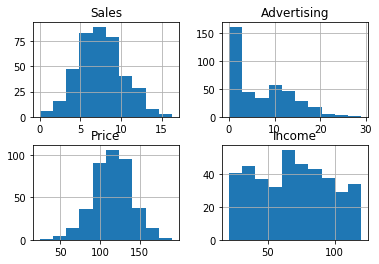

In [6]:
#to plot multiple histograms using subplot function
fig, axes = plt.subplots(nrows=2, ncols=2)

prodata.hist(column = 'Sales', ax = axes[0,0])       
prodata.hist(column = 'Price', ax = axes[1,0])
prodata.hist(column = 'Advertising', ax = axes[0,1])
prodata.hist(column = 'Income', ax = axes[1,1])


# Task: Create Q-Q Plots to observe normality/log-normality of the Sales and Price variates.


D:\PyAna\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\PyAna\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


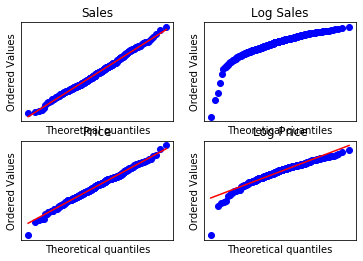

In [7]:
# Plot qq plot to see if Sales and prices are normally and lognormally distributed or not.
# We use pylab library for plotting
import pylab
# Sales
x = prodata['Sales']                      #to store all the data in 'Sales' column in a variable x
pylab.subplot(2,2,1)
pylab.xticks([]),pylab.yticks([])          #we use ticks to set the x and y coordinate to our current subplot frame. 
stats.probplot(x, dist="norm", plot=pylab) #Note we use scipy.stats package to plot qq plot
pylab.title('Sales')

# Price
y= prodata['Price']
pylab.subplot(2,2,3)
pylab.xticks([]), pylab.yticks([])
stats.probplot(y,dist="norm",  plot=pylab)
pylab.title('Price')

# log Sales
x1 = np.log(prodata['Sales'])
pylab.subplot(2,2,2)
pylab.xticks([]),pylab.yticks([])
stats.probplot(x1 , dist="norm", plot=pylab)
pylab.title('Log Sales')

# Log Price
y1 = np.log(prodata['Price'])
pylab.subplot(2,2,4)
pylab.xticks([]),pylab.yticks([])
stats.probplot(y1 ,dist="norm",  plot=pylab)
pylab.title('Log Price')
pylab.show()        # Note we use show function only ONCE at the end after we have plotted all the subplots                   


# 2.2. Inference about the mean

# Task: (i) Apply t-test for the null hypothesis that true mean of Sales is 7.


In [8]:
# mean Sales using mean fuction in numpy library
np.mean(x)

7.496325

In [9]:
# One sample t-test for pop mean =7 using ttest_1sample function in scipy.stats package
stats.ttest_1samp(x,7)

Ttest_1sampResult(statistic=3.5149063789713053, pvalue=0.0004903644587057711)


# (ii) Apply t-test for the null hypothesis that true mean of Price is 115.

In [10]:
# mean Price
np.mean(y)

115.795

In [11]:
# One sample t-test for pop mean =115
stats.ttest_1samp(y,115)

Ttest_1sampResult(statistic=0.671547298464277, pvalue=0.5022605499239496)


# Task: Subset the dataset on the basis of whether the store is located in US or not.

In [12]:
proUSno = prodata[prodata['US'] == 'No']   #storing data where US column is No

proUSno.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,6.823028,124.626761,65.281690,0.507042,252.823944,113.950704,53.133803,14.176056
std,2.602585,16.021089,27.778599,1.644878,152.355328,25.506869,17.339427,2.521677
min,0.000000,77.000000,22.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.080000,115.000000,39.000000,0.000000,113.750000,98.000000,38.000000,12.000000
50%,6.660000,124.000000,66.500000,0.000000,244.000000,116.500000,54.500000,14.000000
75%,8.522500,134.000000,84.000000,0.000000,398.250000,129.750000,65.750000,16.000000
max,14.900000,159.000000,120.000000,11.000000,508.000000,185.000000,80.000000,18.000000


In [13]:
proUSno.describe(include = np.object)

,ShelveLoc,Urban,US
count,142,142,142
unique,3,2,1
top,Medium,Yes,No
freq,84,96,142


In [14]:
proUSyes = prodata[prodata['US'] != 'No']     #storing data where US column is Yes

proUSyes.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,7.866899,125.166667,70.515504,10.007752,271.453488,116.810078,53.426357,13.748062
std,2.877131,14.971547,27.979456,5.917061,144.436459,22.593489,15.571737,2.665987
min,0.370000,85.000000,21.000000,0.000000,12.000000,55.000000,25.000000,10.000000
25%,5.762500,115.250000,45.000000,5.000000,148.250000,101.000000,41.250000,11.000000
50%,7.790000,125.000000,70.000000,10.000000,281.500000,118.000000,54.500000,14.000000
75%,9.987500,135.000000,93.000000,14.000000,397.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [15]:
proUSyes.describe(include = np.object)

,ShelveLoc,Urban,US
count,258,258,258
unique,3,2,1
top,Medium,Yes,Yes
freq,135,186,258



# Task: Perform two sample t-test for equality of means to determine the significance of difference in the Price, Sales inside and outside the US.


In [16]:
#to perform two sample t-test for checking equality of mean using scipy.stats library
stats.ttest_ind(proUSno['Sales'], proUSyes['Sales'], equal_var = False)

Ttest_indResult(statistic=-3.69560686612189, pvalue=0.00025848153073191785)

In [17]:
stats.ttest_ind(proUSno['Price'], proUSyes['Price'], equal_var = False)

Ttest_indResult(statistic=-1.1163770977052774, pvalue=0.2652826006795565)


# Task: Subset the dataset on the basis of the variable ShelveLoc.

In [18]:
proSLbad = prodata[prodata['ShelveLoc'] == 'Bad']
proSLgood = prodata[prodata['ShelveLoc'] == 'Good']
proSLmedium = prodata[prodata['ShelveLoc'] == 'Medium']

In [19]:
proSLbad.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000
mean,5.522917,124.010417,72.239583,6.21875,275.291667,114.270833,52.052083,13.958333
std,2.356349,15.181356,26.908713,6.46318,147.233571,23.779460,17.405002,2.587080
min,0.370000,86.000000,21.000000,0.00000,10.000000,64.000000,25.000000,10.000000
25%,4.052500,116.000000,52.750000,0.00000,145.500000,96.750000,38.000000,12.000000
50%,5.210000,123.500000,73.000000,4.50000,296.000000,113.500000,52.000000,14.000000
75%,7.462500,134.000000,93.000000,11.00000,400.500000,130.000000,68.000000,16.000000
max,11.670000,161.000000,120.000000,23.00000,501.000000,191.000000,80.000000,18.000000


In [20]:
proSLgood.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,10.214000,125.752941,67.976471,7.352941,267.047059,117.882353,52.611765,13.752941
std,2.501243,14.977686,28.314970,6.802846,127.253581,25.128911,15.428093,2.576939
min,3.580000,89.000000,21.000000,0.000000,14.000000,53.000000,25.000000,10.000000
25%,8.330000,115.000000,41.000000,0.000000,176.000000,103.000000,40.000000,11.000000
50%,10.500000,123.000000,70.000000,7.000000,272.000000,122.000000,54.000000,14.000000
75%,11.960000,137.000000,93.000000,12.000000,353.000000,132.000000,63.000000,16.000000
max,16.270000,157.000000,117.000000,24.000000,503.000000,173.000000,80.000000,18.000000


In [21]:
proSLmedium.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,7.306575,125.095890,67.351598,6.538813,259.401826,115.652968,54.155251,13.931507
std,2.266373,15.583599,28.310688,6.680253,154.877765,23.098674,15.969398,2.661286
min,0.000000,77.000000,21.000000,0.000000,12.000000,24.000000,25.000000,10.000000
25%,5.625000,115.000000,42.000000,0.000000,124.000000,101.000000,42.000000,12.000000
50%,7.380000,125.000000,69.000000,5.000000,261.000000,117.000000,55.000000,14.000000
75%,8.775000,135.000000,88.500000,12.000000,405.000000,131.000000,66.000000,16.000000
max,13.360000,175.000000,120.000000,29.000000,509.000000,185.000000,80.000000,18.000000



# 3. Bivariate Analysis

# 3.1. Correlation Analysis

# Task: Visualise the correlation among few pairs of the variables in the dataset.


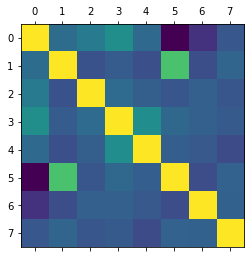

In [22]:
# heatmaps
# using matplotlib library
plt.matshow(prodata.corr()) #matshow function presents each value in a matrix with a different colour
plt.show()


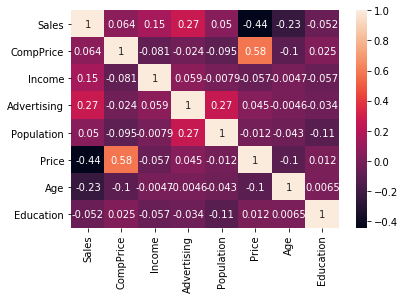

In [23]:
# using seaborn library
sn.heatmap(prodata.corr(), annot = True) # annot=true for writing respective data values in respective cells of matrix
plt.show()


i) Sales and Price


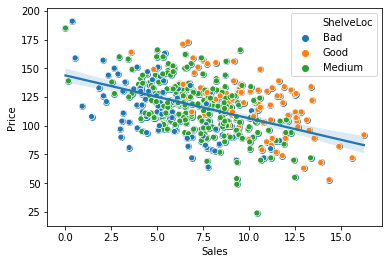

In [24]:
# using seaborn library
sn.regplot('Sales', 'Price', data = prodata)                        #for plotting regression line and scatter plot
sn.scatterplot('Sales','Price', data = prodata, hue = 'ShelveLoc')  #for colouring data wrt ShelveLoc



ii) Sales and Advertising


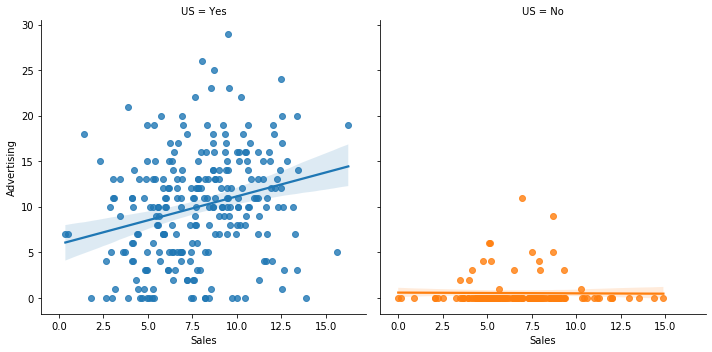

In [25]:
# Sales and Advertising

sn.lmplot('Sales', 'Advertising', data = prodata, hue='US',col = 'US')  #used for plotting regression line across subsets


iii) Price and CompPrice


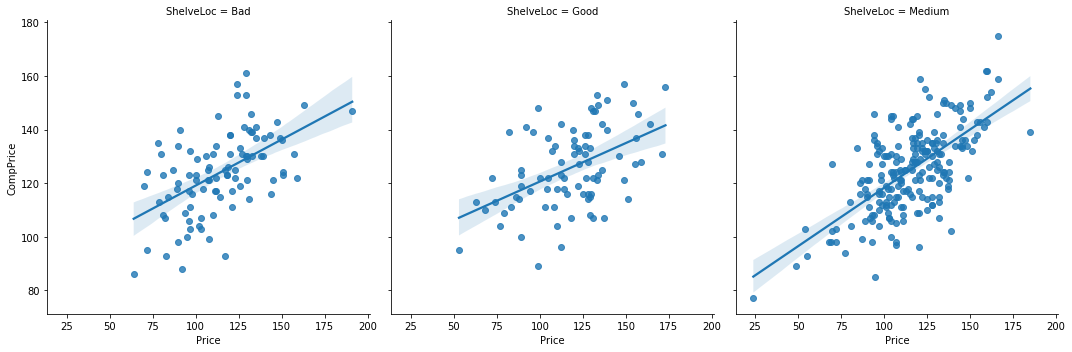

In [26]:
# Price and CompPrice

sn.lmplot('Price', 'CompPrice', data = prodata, col = 'ShelveLoc')


# Task: Perform bivariate correlation analysis for the pairs for which the visualisation was done.

i) Sales and Price


In [27]:
# Using scipy.stats library for calculating Pearsons correlatiom coefficient

# returns array of size 2 with first one giving correlation and second one the p value

stats.pearsonr(prodata['Sales'], prodata['Price']) 

(-0.4449507278465726, 7.61818701191294e-21)


ii) Sales and Advertising


In [28]:
stats.pearsonr(proUSyes['Sales'], proUSyes['Advertising'])

(0.2557332136720915, 3.2235297637721183e-05)

In [29]:
stats.pearsonr(proUSno['Sales'], proUSno['Advertising'])

(-0.012604171233108644, 0.881652734065547)


iii) Price and CompPrice


In [30]:
stats.pearsonr(proSLbad['Price'], proSLbad['CompPrice'])

(0.5386937262954956, 1.499971229630287e-08)

In [31]:
stats.pearsonr(proSLgood['Price'], proSLgood['CompPrice'])

(0.4825042232095378, 2.9212855433476207e-06)

In [32]:
stats.pearsonr(proSLmedium['Price'], proSLmedium['CompPrice'])

(0.6463411920005989, 2.7154726105158895e-27)


# 3.2. Bivariate Linear Regression Analysis

# Task: Fitting a bivariate linear regression model

(i) Price vs. CompPrice


In [33]:
# model fitting using statsmodels.api

Y = prodata['Price']                     ## Y usually means our output variables (or dependent variables)
X = prodata['CompPrice']                 ## X usually means our input/independent variable
X = sm.add_constant(X)                   ## adds an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit()               ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     206.9
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.50e-38
Time:                        15:10:36   Log-Likelihood:                -1749.1
No. Observations:                 400   AIC:                             3502.
Df Residuals:                     398   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9411      7.904      0.372      0.710     -12.598      18.481
CompPrice      0.9030      0.063     14.384      0.000       0.780       1.026
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.115
Skew:                          -0.021   Prob(JB):                        0.944
Kurtosis:                       2.929   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


(ii) Sales vs. Price


In [34]:
# (ii) Sales vs. Price

X1 = prodata['Price']                     ## X usually means our input variables (or independent variables)
Y1 = prodata['Sales']                 ## Y usually means our output/dependent variable
X1 = sm.add_constant(X1)                   ## adds an intercept (beta_0) to our model

# Note the difference in argument order
model1 = sm.OLS(Y1, X1).fit()               ## sm.OLS(output, input)

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.62e-21
Time:                        15:10:36   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# 3.3.Regression Diagnostics

# Task: Plot the actual values along with the fitted regression line  

(i) Price vs CompPrice


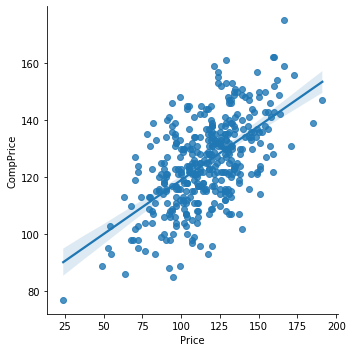

In [35]:
sn.lmplot('Price', 'CompPrice', data = prodata)


(ii) Sales vs Price


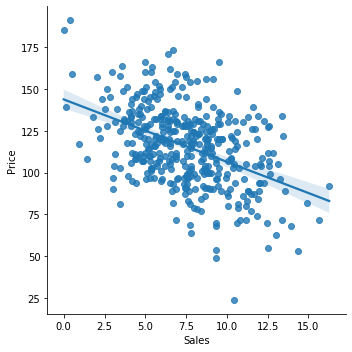

In [36]:
sn.lmplot('Sales', 'Price', data = prodata)


# Task: Plot Residuals vs. Predicted with 3,2,1 sigma limits (to test the presence of heteroscedasticity).

(i) Price vs CompPrice


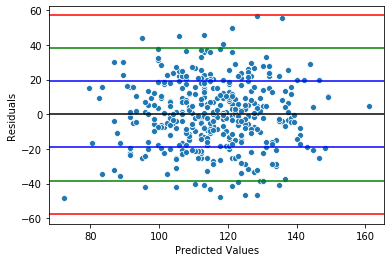

In [37]:
predictions = model.predict(X)
residuals = Y - predictions
sd_red=np.std(residuals)             #using std function in numpy library to calcuate std dev. of residuals
a=[-3,-2,-1,0,1,2,3]                 #for sigma limits              
b=['r','g','b','k','b','g','r']     #for color code of sigma lines
sn.scatterplot(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
for i,j in zip(a,b):
    plt.axhline(i*sd_red,color=j)    #to draw horizontal lines such as y=k where k is a constant specified


(ii) Sales vs. Price


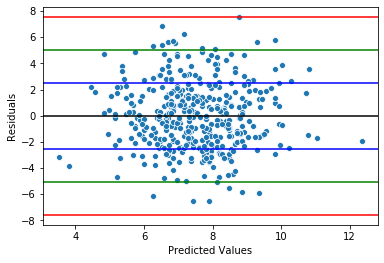

In [38]:
predictions1 = model1.predict(X1)
residuals1 = Y1 - predictions1
sd_red=np.std(residuals1)             
a=[-3,-2,-1,0,1,2,3]                              
b=['r','g','b','k','b','g','r']     
sn.scatterplot(predictions1, residuals1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
for i,j in zip(a,b):
    plt.axhline(i*sd_red,color=j)


# Task: Visualise the distribution of residuals (To test for the normality of error terms).

(i) Price vs. CompPrice


Text(0, 0.5, 'Count')

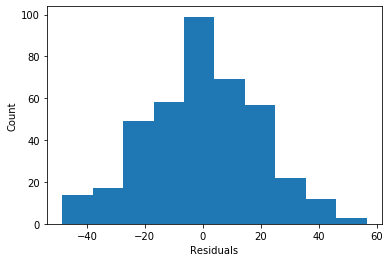

In [39]:
plt.hist(residuals)        #by default bin is set to 10
plt.xlabel('Residuals')
plt.ylabel('Count')

Text(0, 0.5, 'Proportion')

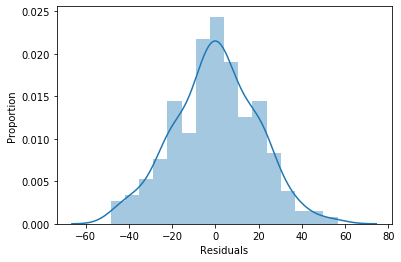

In [40]:
sn.distplot(residuals)  
plt.xlabel('Residuals')
plt.ylabel('Proportion')


(ii) Sales vs. Price


Text(0, 0.5, 'Count')

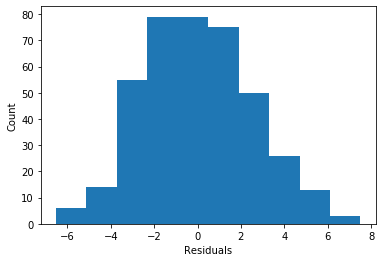

In [41]:
plt.hist(residuals1)
plt.xlabel('Residuals')
plt.ylabel('Count')

Text(0, 0.5, 'Proportion')

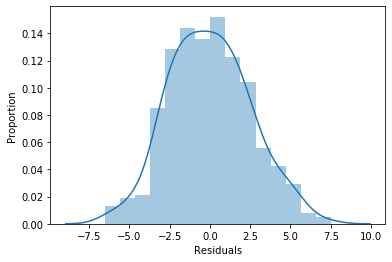

In [42]:
sn.distplot(residuals1)
plt.xlabel('Residuals')
plt.ylabel('Proportion')


# Task: Create QQ-Plot of the residuals

(i) Price vs. CompPrice


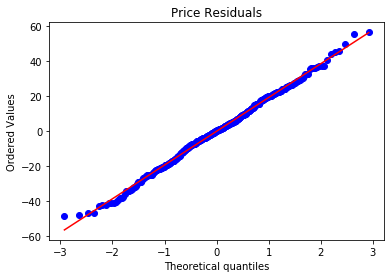

In [43]:
stats.probplot(residuals, dist="norm",  plot=pylab)
pylab.title('Price Residuals')
pylab.show()


(ii) Sales vs. Price


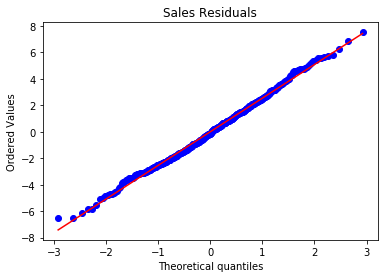

In [44]:
stats.probplot(residuals1, dist="norm",  plot=pylab)
pylab.title('Sales Residuals')
pylab.show() 

# 3.4. RMSE 

# Task: Find the values of RMSE and coefficient of determination for both the models.

(i) Price vs. CompPrice


In [45]:
# Calculating mean square error and r score using sklearn library

rmse = sk.mean_squared_error(Y, predictions, squared = False)
r2 = sk.r2_score(Y, predictions)

print('RMSE' + ' = ' + str(rmse))
print('R2' + ' = ' + str(r2))

RMSE = 19.181140897426136
R2 = 0.34204691026776424



(ii) Sales vs. Price


In [46]:
rmse_1 = sk.mean_squared_error(Y1, predictions1, squared = False)
r2_1 = sk.r2_score(Y1, predictions1)

print('RMSE' + ' = ' + str(rmse_1))
print('R2' + ' = ' + str(r2_1))

RMSE = 2.525987080727786
R2 = 0.19798115021119478



# 3.5. Prediction of the response variable

# Task: Predict the values for Sales and Price for the mean values of Price and CompPrice respectively.

a) Method of Regression Equation


In [47]:
mean_cp = np.mean(X['CompPrice'])
mean_p = np.mean(X1['Price'])

print(mean_cp)
print(mean_p)

124.975
115.795


In [48]:
# i) Price when CompPrice = 124.975

mp = model.params
print(mp)
print('') # line spacing

predprice1 = mp['const'] + mean_cp*mp['CompPrice']
print(predprice1)

const        2.941105
CompPrice    0.903012
dtype: float64

115.79499999999999


In [49]:
# ii) Sales when Price = 115.795

mp1 = model1.params
print(mp1)
print('') # line spacing

predsales1 = mp1['const'] + mean_p*mp1['Price']
print(predsales1)

const    13.641915
Price    -0.053073
dtype: float64

7.496325000000005


b) Using the predict function

In [50]:
# i) Price when CompPrice = 124.975

cp = [1, 124.975] # adding constant for b0
predprice2 = model.predict(cp)
print(predprice2)

[115.795]


In [51]:
# ii) Sales when Price = 115.795

p = [1, 115.795]
predsales2 = model1.predict(p)
print(predsales2)

[7.496325]


# 3.7.Robust Regression

# Task: Compute a robust regression. Compare the fitted lines and the coefficient of determination (R2) of this with those from the least-squares fit.

(i) Price vs. CompPrice


In [52]:
# Using statsmodels.api library
robust = sm.RLM(Y, X).fit()
robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  Price   No. Observations:                  400
Model:                            RLM   Df Residuals:                      398
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 24 May 2020                                         
Time:                        15:10:40                                         
No. Iterations:                    11                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8775      8.101      0.479      0.632     -11.999      19.754
CompPrice      0.8965      0.064     13.935      0.000       0.770       1.023
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""


(ii) Sales vs. Price


In [53]:
robust1 = sm.RLM(Y1, X1).fit()
robust1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  400
Model:                            RLM   Df Residuals:                      398
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 24 May 2020                                         
Time:                        15:10:40                                         
No. Iterations:                    13                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6501      0.641     21.293      0.000      12.394      14.907
Price         -0.0536      0.005     -9.875      0.000      -0.064      -0.043
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

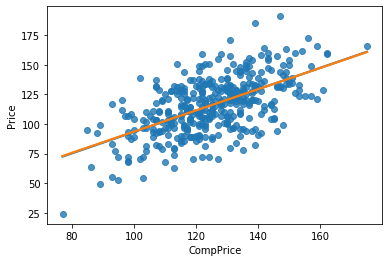

In [54]:
sn.regplot('CompPrice', 'Price', data = prodata, ci = None, label = 'L')
sn.regplot('CompPrice', 'Price', data = prodata, robust = True, scatter = False, marker = '~', ci = None, label = 'R')

 
# 4. Multivariate Correlation and Regression

# 4.1. Multivariate Correlation Analysis

# Task: Calculate pair wise correlation coefficients for the numeric variables.

In [55]:
prodata.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


 
# 4.2 Multiple Regression Analysis


# Task: Compare null, simple and multiple regression models.


In [56]:
# (i) Price as Response

# Null model 

x_0 = np.array([0])
X_0 = np.repeat(x_0, 400)     #making array of size 400 with 0 as element
X_0 = sm.add_constant(X_0)

null = sm.OLS(Y, X_0).fit()
null.summary()

D:\PyAna\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\PyAna\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\PyAna\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 24 May 2020   Prob (F-statistic):                nan
Time:                        15:10:41   Log-Likelihood:                -1832.9
No. Observations:                 400   AIC:                             3668.
Df Residuals:                     399   BIC:                             3672.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.7950      1.184     97.814      0.000     113.468     118.122
x1                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                        3.897   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                4.139
Skew:                          -0.125   Prob(JB):                        0.126
Kurtosis:                       3.431   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# Simple 1

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     206.9
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.50e-38
Time:                        15:10:41   Log-Likelihood:                -1749.1
No. Observations:                 400   AIC:                             3502.
Df Residuals:                     398   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9411      7.904      0.372      0.710     -12.598      18.481
CompPrice      0.9030      0.063     14.384      0.000       0.780       1.026
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.115
Skew:                          -0.021   Prob(JB):                        0.944
Kurtosis:                       2.929   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Simple 2

X_s = prodata['Sales']
X_s = sm.add_constant(X_s)

model_s = sm.OLS(Y, X_s).fit()
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.62e-21
Time:                        15:10:41   Log-Likelihood:                -1788.7
No. Observations:                 400   AIC:                             3581.
Df Residuals:                     398   BIC:                             3589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.7589      3.014     47.692      0.000     137.833     149.685
Sales         -3.7304      0.376     -9.912      0.000      -4.470      -2.990
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.442
Skew:                          -0.062   Prob(JB):                        0.802
Kurtosis:                       3.105   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Multiple

X_cs = prodata[['CompPrice', 'Sales']]
X_cs = sm.add_constant(X_cs)

multiple = sm.OLS(Y, X_cs).fit()
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     269.4
Date:                Sun, 24 May 2020   Prob (F-statistic):           1.21e-74
Time:                        15:10:41   Log-Likelihood:                -1661.4
No. Observations:                 400   AIC:                             3329.
Df Residuals:                     397   BIC:                             3341.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3956      6.567      4.172      0.000      14.485      40.306
CompPrice      0.9509      0.051     18.801      0.000       0.852       1.050
Sales         -4.0612      0.275    -14.788      0.000      -4.601      -3.521
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.697
Skew:                           0.234   Prob(JB):                        0.157
Kurtosis:                       2.948   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# (ii) Sales as Response

# Null model 

x1_0 = np.array([0])
X1_0 = np.repeat(x1_0, 400)
X1_0 = sm.add_constant(X1_0)

null1 = sm.OLS(Y1, X1_0).fit()
null1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 24 May 2020   Prob (F-statistic):                nan
Time:                        15:10:41   Log-Likelihood:                -982.35
No. Observations:                 400   AIC:                             1967.
Df Residuals:                     399   BIC:                             1971.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.141     53.088      0.000       7.219       7.774
x1                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.381   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.428
Skew:                           0.185   Prob(JB):                        0.297
Kurtosis:                       2.905   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
# Simple 1
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.62e-21
Time:                        15:10:41   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Simple 2

X_a = prodata[['Advertising']]
X_a = sm.add_constant(X_a)

model_a = sm.OLS(Y1, X_a).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.38e-08
Time:                        15:10:41   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      0.000       6.359       7.115
Advertising     0.1144      0.020      5.583      0.000       0.074       0.155
==============================================================================
Omnibus:                        3.396   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.137
Skew:                           0.200   Prob(JB):                        0.208
Kurtosis:                       3.167   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Multiple

X_pa = prodata[['Price', 'Advertising']]
X_pa = sm.add_constant(X_pa)
multiple1 = sm.OLS(Y1, X_pa).fit()
multiple1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.87e-29
Time:                        15:10:41   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0034      0.607     21.428      0.000      11.810      14.196
Price          -0.0546      0.005    -10.755      0.000      -0.065      -0.045
Advertising     0.1231      0.018      6.809      0.000       0.088       0.159
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.006
Skew:                           0.121   Prob(JB):                        0.605
Kurtosis:                       3.037   Cond. No.                         599.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC, Adj R2 directly comparable from the table


Comparing regression models with ANOVA


In [64]:
#Residual sum of squares

#a)Price as respnse

#i) Simple(Price Vs Sales)

simple_rss=np.sum(np.square(Y-model_s.predict(X_s)))
display(simple_rss)

#ii)Multiple(Price Vs CompPrice+Sales)

multiple_rss=np.sum(np.square(Y-multiple.predict(X_cs)))
display(multiple_rss)

# percentage decrease in multiple's SSR(wrt Simple)

frac_inc=(simple_rss-multiple_rss)/simple_rss
display(frac_inc*100)
#b) Sales as response

#i)Simple(SalesVs A1dvertisement)

simple1_rss=np.sum(np.square(Y1-model_a.predict(X_a)))
display(simple1_rss)
#ii) Multiple(Sales Vs price+Advertisement)

multiple1_rss=np.sum(np.square(Y1-multiple1.predict(X_pa)))
display(multiple1_rss)

# percentage decrease in multiple's SSR(wrt Simple)

frac_inc1=(simple1_rss-multiple1_rss)/simple1_rss
display(frac_inc1*100)


179390.1145723929

94895.06818310011

47.101283474120756

2951.133659007373

2285.3327428124385

22.560852645992306


# 4.4.Regression Diagnostics

# Task: Analyse the regression diagnostics for the best model.


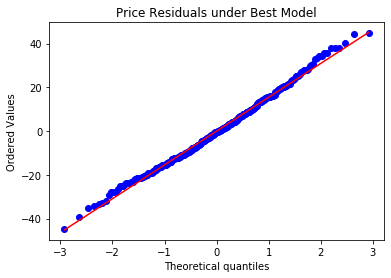

In [65]:
# (i) Price

pred_mult = multiple.predict(X_cs)
resid_mult = Y - pred_mult

## QQ plot
stats.probplot(resid_mult, dist = "norm",  plot=pylab)
pylab.title('Price Residuals under Best Model')
pylab.show()


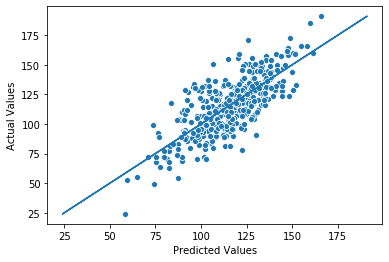

In [66]:
## Pred vs. Actual
sn.scatterplot(pred_mult, Y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(Y, Y)
plt.show()

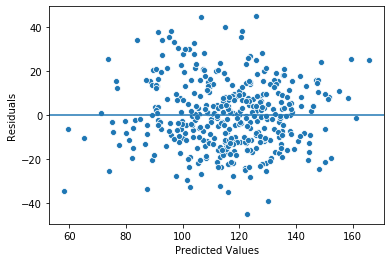

In [67]:
## Pred vs. Residuals
sn.scatterplot(pred_mult, resid_mult)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.show()

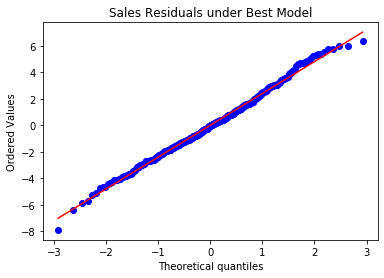

In [68]:
# (ii) Sales

pred_mult1 = multiple1.predict(X_pa)
resid_mult1 = Y1 - pred_mult1

## QQ plot
stats.probplot(resid_mult1, dist = "norm",  plot=pylab)
pylab.title('Sales Residuals under Best Model')
pylab.show()


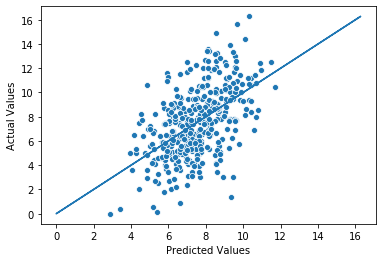

In [69]:
## Pred vs. Actual
sn.scatterplot(pred_mult1, Y1)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(Y1, Y1)
plt.show()


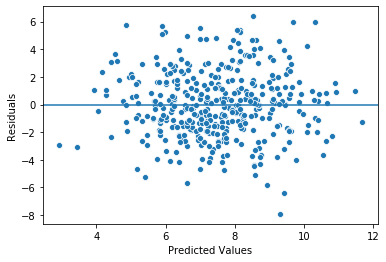

In [70]:
## Pred vs. Residuals
sn.scatterplot(pred_mult1, resid_mult1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.show()

Task: Apply backward stepwise regression on the full model.

In [71]:
# R is pyaar rant number 8273
# Python doesnt have a function for backward elimination

# Sales as response

prodata1=pd.get_dummies(prodata)
X=['CompPrice', 'Income','Advertising','Population','Price','Age','Education',
   'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes'] #Starting with all

k=len(X)
# now we remove one by one
for i in range(0,k):               # at max we will remove all ind. var. (which will ofcourse not happen ever) so limit till k
    X1= sm.add_constant(prodata1[X])
    model = sm.OLS(Y1, X1).fit()
    aic1=model.aic
    display('When independent variables are')
    display(X)
    display('AIC is'+str(aic1)) # displaying Aic at each step after removal
    arraic=[]       # for storing AICs when variables are removed
    # now to calculate all aics and store them while removing var one by one
    for j in range(0,len(X)):                                  
        X2=X[0:j]+X[(j+1):len(X)]  # making a new array of ind variables removing the jth position element
        # display(X2)
        X3=sm.add_constant(prodata1[X2])
        model2= sm.OLS(Y1, X3).fit()
        aic2=model2.aic#AIC of model with jth element removed
        #display(aic2)
        arraic=arraic+[aic2]    #Storing AIC of model when jth element is removed
    #after this for loop we got the array of aics when we remove elements one by one
    #display(arraic)
    #display(min(arraic))
    if(min(arraic)<aic1):    #now if the min of AICs we got is less than our previous step then only we reduce our ind variable
        indrem=arraic.index(min(arraic))
        #display(arraic.index(min(arraic)))
        display('Removed variable is '+X[indrem])
        Xf=X[0:indrem]+X[indrem+1:len(X)]
        #display(Xf)
        X=Xf
    else:                      #now if the min of AICs we got is NOT less than our previous step we terminate our prog as  
        break                  #model cant be improved further
    
display("final set of independent variables for response Sales are")
display(X)

'When independent variables are'

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

'AIC is1161.974352034826'

'Removed variable is Population'

'When independent variables are'

['CompPrice',
 'Income',
 'Advertising',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

'AIC is1160.2988352800417'

'Removed variable is Education'

'When independent variables are'

['CompPrice',
 'Income',
 'Advertising',
 'Price',
 'Age',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

'AIC is1159.645824577243'

'final set of independent variables for response Sales are'

['CompPrice',
 'Income',
 'Advertising',
 'Price',
 'Age',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [72]:
#ii) For Price as response
prodata1=pd.get_dummies(prodata)
X=['CompPrice', 'Income','Advertising','Population','Sales','Age','Education','ShelveLoc_Bad','ShelveLoc_Good',
   'ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes'] #Starting with all

k=len(X)
#now we remove one by one
for i in range(0,k):               # at max we will remove all ind. var. (which will ofcourse not happen ever) so limit till k
    X1= sm.add_constant(prodata1[X])
    if(min(arraic)<aic1):   #now if the min of AICs we got is less than our previous step then only we reduce our ind variable
        indrem=arraic.index(min(arraic))
        display('Removed variable is '+X[indrem])
        #display(arraic.index(min(arraic)))
    model = sm.OLS(Y, X1).fit()
    aic1=model.aic
    display('When independent variables are')
    display(X)
    display('AIC is'+str(aic1)) #displaying Aic at each step after removal
    arraic=[]       #for storing AICs when variables are removed
    #now to calculate all aics and store them while removing var one by one
    for j in range(0,len(X)):                                  
        X2=X[0:j]+X[(j+1):len(X)]  #making a new array of ind variables removing the jth position element
        #display(X2)
        X3=sm.add_constant(prodata1[X2])
        model2= sm.OLS(Y, X3).fit()
        aic2=model2.aic#AIC of model with jth element removed
        #display(aic2)
        arraic=arraic+[aic2]    #Storing AIC of model when jth element is removed
    #after this for loop we got the array of aics when we remove elements one by one
    #display(arraic)
    #display(min(arraic))
        Xf=X[0:indrem]+X[indrem+1:len(X)]
        #display(Xf)
        X=Xf
    else:                      #now if the min of AICs we got is NOT less than our previous step we terminate our prog as  
        break                  #model cant be improved further
    
display("final set of independent variables for response Response are")
display(X)

'When independent variables are'

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Sales',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

'AIC is2935.761413091066'

'final set of independent variables for response Response are'

['CompPrice', 'Income', 'Advertising', 'Population', 'Sales']


# Task:  Combine a continuous and a discrete explanatory variable to predict Sales.


In [73]:
#i) Sales Vs price
X_p = prodata[['Price']]
X_p = sm.add_constant(X_p)

model_sp = sm.OLS(Y1, X_p).fit()
model_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sun, 24 May 2020   Prob (F-statistic):           7.62e-21
Time:                        15:10:44   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#ii)Sales Vs ShelveLoc

prodata1=pd.get_dummies(prodata,columns=['ShelveLoc'])
X_sl = prodata1[['ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium']]
X_sl = sm.add_constant(X_sl)

model_ssl = sm.OLS(Y1, X_sl).fit()
model_ssl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Sun, 24 May 2020   Prob (F-statistic):           1.27e-33
Time:                        15:10:44   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7609      0.096     60.228      0.000       5.573       5.949
ShelveLoc_Bad       -0.2380      0.194     -1.226      0.221      -0.619       0.144
ShelveLoc_Good       4.4531      0.203     21.901      0.000       4.053       4.853
ShelveLoc_Medium     1.5457      0.147     10.506      0.000       1.256       1.835
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                     5.34e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
#iii) SalesVS Price+ShelveLoc
prodata1=pd.get_dummies(prodata,columns=['ShelveLoc'])
X_slp = prodata1[['Price','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium']]
X_slp = sm.add_constant(X_slp)

model_slp = sm.OLS(Y1, X_slp).fit()
model_slp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 24 May 2020   Prob (F-statistic):           6.49e-67
Time:                        15:10:44   Log-Likelihood:                -825.92
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     396   BIC:                             1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.6908      0.362     29.568      0.000       9.980      11.402
Price               -0.0567      0.004    -13.967      0.000      -0.065      -0.049
ShelveLoc_Bad        1.3110      0.194      6.762      0.000       0.930       1.692
ShelveLoc_Good       6.2068      0.209     29.748      0.000       5.797       6.617
ShelveLoc_Medium     3.1730      0.168     18.925      0.000       2.843       3.503
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.651
Skew:                           0.062   Prob(JB):                        0.438
Kurtosis:                       2.711   Cond. No.                     2.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


# Task: Use discrete variable to plot parallel lines of regression


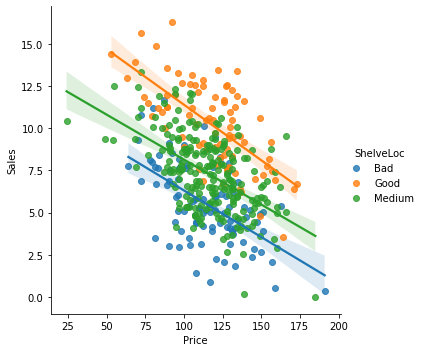

In [76]:

#i)Sales Vs Price by ShelveLoc

sn.lmplot('Price', 'Sales', data = prodata, hue='ShelveLoc')


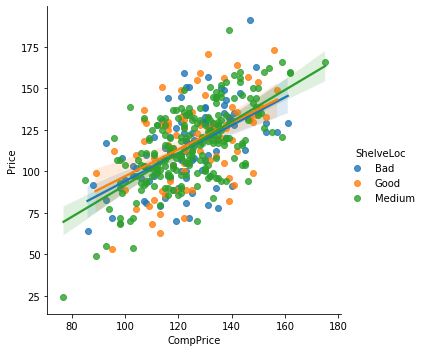

In [77]:

#ii)Price vs CompPrice by ShelveLoc

sn.lmplot('CompPrice', 'Price', data = prodata, hue='ShelveLoc')


# Task: Use interactions to model response

In [78]:

import statsmodels.formula.api as smf   #package for modelling like R formulae
prodata1=pd.get_dummies(prodata)
int_model=smf.ols(formula = 
                  'Sales ~ Price + ShelveLoc_Good+ShelveLoc_Bad+ShelveLoc_Medium+Price:ShelveLoc_Good+Price:ShelveLoc_Bad+Price:ShelveLoc_Medium', 
                  data = prodata1).fit()
int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     94.17
Date:                Sun, 24 May 2020   Prob (F-statistic):           4.62e-65
Time:                        15:10:46   Log-Likelihood:                -825.11
No. Observations:                 400   AIC:                             1662.
Df Residuals:                     394   BIC:                             1686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.8163      0.386     28.045      0.000      10.058      11.575
Price                     -0.0436      0.003    -13.383      0.000      -0.050      -0.037
ShelveLoc_Good             7.1525      0.808      8.855      0.000       5.565       8.740
ShelveLoc_Bad              1.0167      0.784      1.296      0.196      -0.525       2.559
ShelveLoc_Medium           2.6471      0.607      4.359      0.000       1.453       3.841
Price:ShelveLoc_Good      -0.0222      0.007     -3.303      0.001      -0.035      -0.009
Price:ShelveLoc_Bad       -0.0117      0.007     -1.741      0.082      -0.025       0.002
Price:ShelveLoc_Medium    -0.0097      0.005     -1.883      0.060      -0.020       0.000
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.763
Skew:                           0.067   Prob(JB):                        0.414
Kurtosis:                       2.704   Cond. No.                     5.71e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""